In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

from collections import Counter

import pandas as pd
from pandas.plotting import bootstrap_plot,scatter_matrix

import numpy as np

## Sklearn Package Loading
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV,KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn import clone # Clone function


from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec




from ase.io import read
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

plt.style.use('seaborn-whitegrid')



/home/goback-server/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re

# Regular expression pattern
pattern = re.compile(r"([A-Z][a-z]*)(\d*)")

def process_match(match):
    element = match.group(1)
    if match.group(2) == '':
        return element
    count = int(match.group(2))
    return element * count

# Function to apply the regex transformation to each element in the list
def transform_value(value):
    result = pattern.sub(process_match, value)
    return result

In [3]:
df = pd.read_csv("final_db.csv", sep='\t')

In [4]:
df.head()

,Unnamed: 0,ids,bandgaps,_chemical_formula_sum,_chemical_formula_weight,_space_group_IT_number,_symmetry_cell_setting,_symmetry_space_group_name_H-M,_cell_angle_alpha,_cell_angle_beta,...,_diffrn_reflns_limit_k_min,_diffrn_reflns_limit_l_max,_diffrn_reflns_limit_l_min,_diffrn_reflns_number,_diffrn_reflns_theta_full,_diffrn_reflns_theta_max,_diffrn_reflns_theta_min,_exptl_absorpt_coefficient_mu,_exptl_absorpt_correction_T_max,_exptl_absorpt_correction_T_min
0,0,4074437,1.118755,C15 H28 Mo N4 O2 P2,454.29,2.0,3.0,P -1,100.182,93.405,...,-11.0,18.0,-19.0,4267.0,-100.000,27.940,3.940,0.852,0.7849,0.7015
1,1,7226496,3.335133,C11 H8 Cl4 O3,329.97,2.0,-100.1,P -1,84.549,86.322,...,-8.0,19.0,-14.0,4489.0,25.214,26.015,2.618,0.770,0.9650,0.9200
2,2,1507720,2.854547,C19 H17 N O5,339.34,2.0,3.0,P -1,82.166,78.000,...,-11.0,14.0,0.0,8848.0,27.450,27.450,1.830,0.108,0.9957,0.9633
3,3,7215594,3.145922,C11 H10 Cl2 N2,241.11,9.0,1.0,C 1 c 1,90.000,100.024,...,-21.0,16.0,-16.0,3681.0,25.000,25.000,4.500,0.568,1.0000,0.7330
4,4,2101963,3.467795,C12 H13 N O2,203.24,14.0,1.0,P 1 21/c 1,90.000,110.890,...,0.0,7.0,-7.0,2917.0,-100.100,25.000,2.000,0.090,-100.1000,-100.1000


In [5]:
def summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Last Value'] = df.iloc[-1].values 

    return summary

In [ ]:
X_tsne = TSNE(learning_rate=100).fit_transform(df[df.columns.difference(['bandgaps','_chemical_formula_sum', "_symmetry_space_group_name_H-M"])])

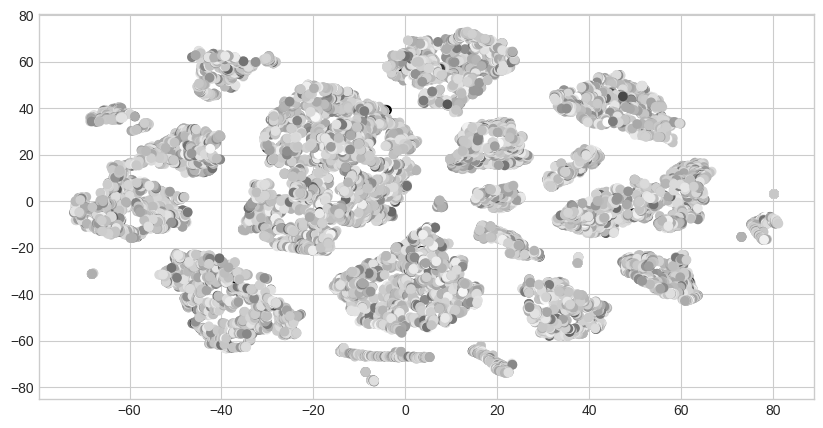

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['bandgaps'])
plt.show()

In [7]:
display(df.drop(['ids', '_chemical_formula_sum', '_symmetry_space_group_name_H-M'], axis=1).describe().transpose())
summary(df.drop(['ids', '_chemical_formula_sum', '_symmetry_space_group_name_H-M'], axis=1))

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12500.0,6249.500000,3608.583517,0.0000,3124.750000,6249.500000,9374.250000,1.249900e+04
bandgaps,12499.0,3.047012,1.031001,0.0000,2.369495,2.962299,3.635177,8.535709e+00
_chemical_formula_weight,12500.0,311.984818,168.670962,-100.1000,207.180000,286.330000,384.430000,2.718580e+03
_space_group_IT_number,12500.0,8.814480,17.767164,-100.1000,2.000000,4.000000,14.000000,2.050000e+02
_symmetry_cell_setting,12500.0,-7.934320,30.751508,-100.1000,1.000000,1.000000,3.000000,7.000000e+00
_cell_angle_alpha,12500.0,89.729434,8.809803,58.3600,90.000000,90.000000,90.000000,1.213300e+02
_cell_angle_beta,12500.0,94.855086,10.639843,28.6640,90.000000,94.474500,101.741000,1.663251e+02
_cell_angle_gamma,12500.0,89.724567,9.692186,60.5540,90.000000,90.000000,90.000000,1.352600e+02
_cell_formula_units_Z,12500.0,2.443216,4.060368,-100.1000,2.000000,2.000000,4.000000,1.600000e+01
_cell_length_a,12500.0,8.067356,2.961394,3.3392,6.171900,7.622350,9.178500,3.732500e+01


Dataset Shape: (12500, 33)


,Name,dtypes,Missing,Uniques,First Value,Last Value
0,Unnamed: 0,int64,0,12500,0.000000,12499.00000
1,bandgaps,float64,1,12444,1.118755,NaN
2,_chemical_formula_weight,float64,0,7412,454.290000,255.30000
3,_space_group_IT_number,float64,0,76,2.000000,2.00000
4,_symmetry_cell_setting,float64,0,5,3.000000,3.00000
5,_cell_angle_alpha,float64,0,5026,100.182000,104.53700
6,_cell_angle_beta,float64,0,9250,93.405000,106.43500
7,_cell_angle_gamma,float64,0,5040,110.024000,90.00200
8,_cell_formula_units_Z,float64,0,11,2.000000,2.00000
9,_cell_length_a,float64,0,10944,8.503000,6.17780


In [18]:
df= df.dropna(axis = 0, how ='any')  
df.reset_index(drop=True)


,Unnamed: 0,ids,bandgaps,_chemical_formula_sum,_chemical_formula_weight,_space_group_IT_number,_symmetry_cell_setting,_symmetry_space_group_name_H-M,_cell_angle_alpha,_cell_angle_beta,...,_diffrn_reflns_limit_k_min,_diffrn_reflns_limit_l_max,_diffrn_reflns_limit_l_min,_diffrn_reflns_number,_diffrn_reflns_theta_full,_diffrn_reflns_theta_max,_diffrn_reflns_theta_min,_exptl_absorpt_coefficient_mu,_exptl_absorpt_correction_T_max,_exptl_absorpt_correction_T_min
0,0,4074437,1.118755,C15 H28 Mo N4 O2 P2,454.29,2.0,3.0,P -1,100.1820,93.4050,...,-11.0,18.0,-19.0,4267.0,-100.000,27.940,3.940,0.852,0.7849,0.7015
1,1,7226496,3.335133,C11 H8 Cl4 O3,329.97,2.0,-100.1,P -1,84.5490,86.3220,...,-8.0,19.0,-14.0,4489.0,25.214,26.015,2.618,0.770,0.9650,0.9200
2,2,1507720,2.854547,C19 H17 N O5,339.34,2.0,3.0,P -1,82.1660,78.0000,...,-11.0,14.0,0.0,8848.0,27.450,27.450,1.830,0.108,0.9957,0.9633
3,3,7215594,3.145922,C11 H10 Cl2 N2,241.11,9.0,1.0,C 1 c 1,90.0000,100.0240,...,-21.0,16.0,-16.0,3681.0,25.000,25.000,4.500,0.568,1.0000,0.7330
4,4,2101963,3.467795,C12 H13 N O2,203.24,14.0,1.0,P 1 21/c 1,90.0000,110.8900,...,0.0,7.0,-7.0,2917.0,-100.100,25.000,2.000,0.090,-100.1000,-100.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,12494,7103466,2.515412,C11 H21 O2 P,216.25,2.0,3.0,P -1,79.0472,85.1087,...,-12.0,17.0,-17.0,26437.0,30.720,30.720,1.740,0.200,-100.1000,-100.1000
12393,12495,4029970,1.896349,C21 H24 O2,308.40,2.0,-100.1,P -1,100.4130,92.5030,...,-8.0,20.0,-2.0,2211.0,66.650,66.650,2.540,0.613,-100.1000,-100.1000
12394,12496,7104280,3.867184,C40 H48 N4 P2,646.76,2.0,3.0,P -1,85.8725,74.5382,...,-12.0,13.0,-13.0,9748.0,26.370,26.370,2.560,0.158,0.9920,0.9620
12395,12497,4501868,4.307790,C22 H46 N6 S2,458.77,2.0,3.0,P -1,85.8910,76.8830,...,-12.0,12.0,-12.0,7305.0,26.990,26.990,2.180,0.226,0.9821,0.9394


In [19]:
correlation_matrix=df.drop(['Unnamed: 0','ids', '_chemical_formula_sum', '_symmetry_space_group_name_H-M'], axis=1).corr(method='pearson', min_periods=1)

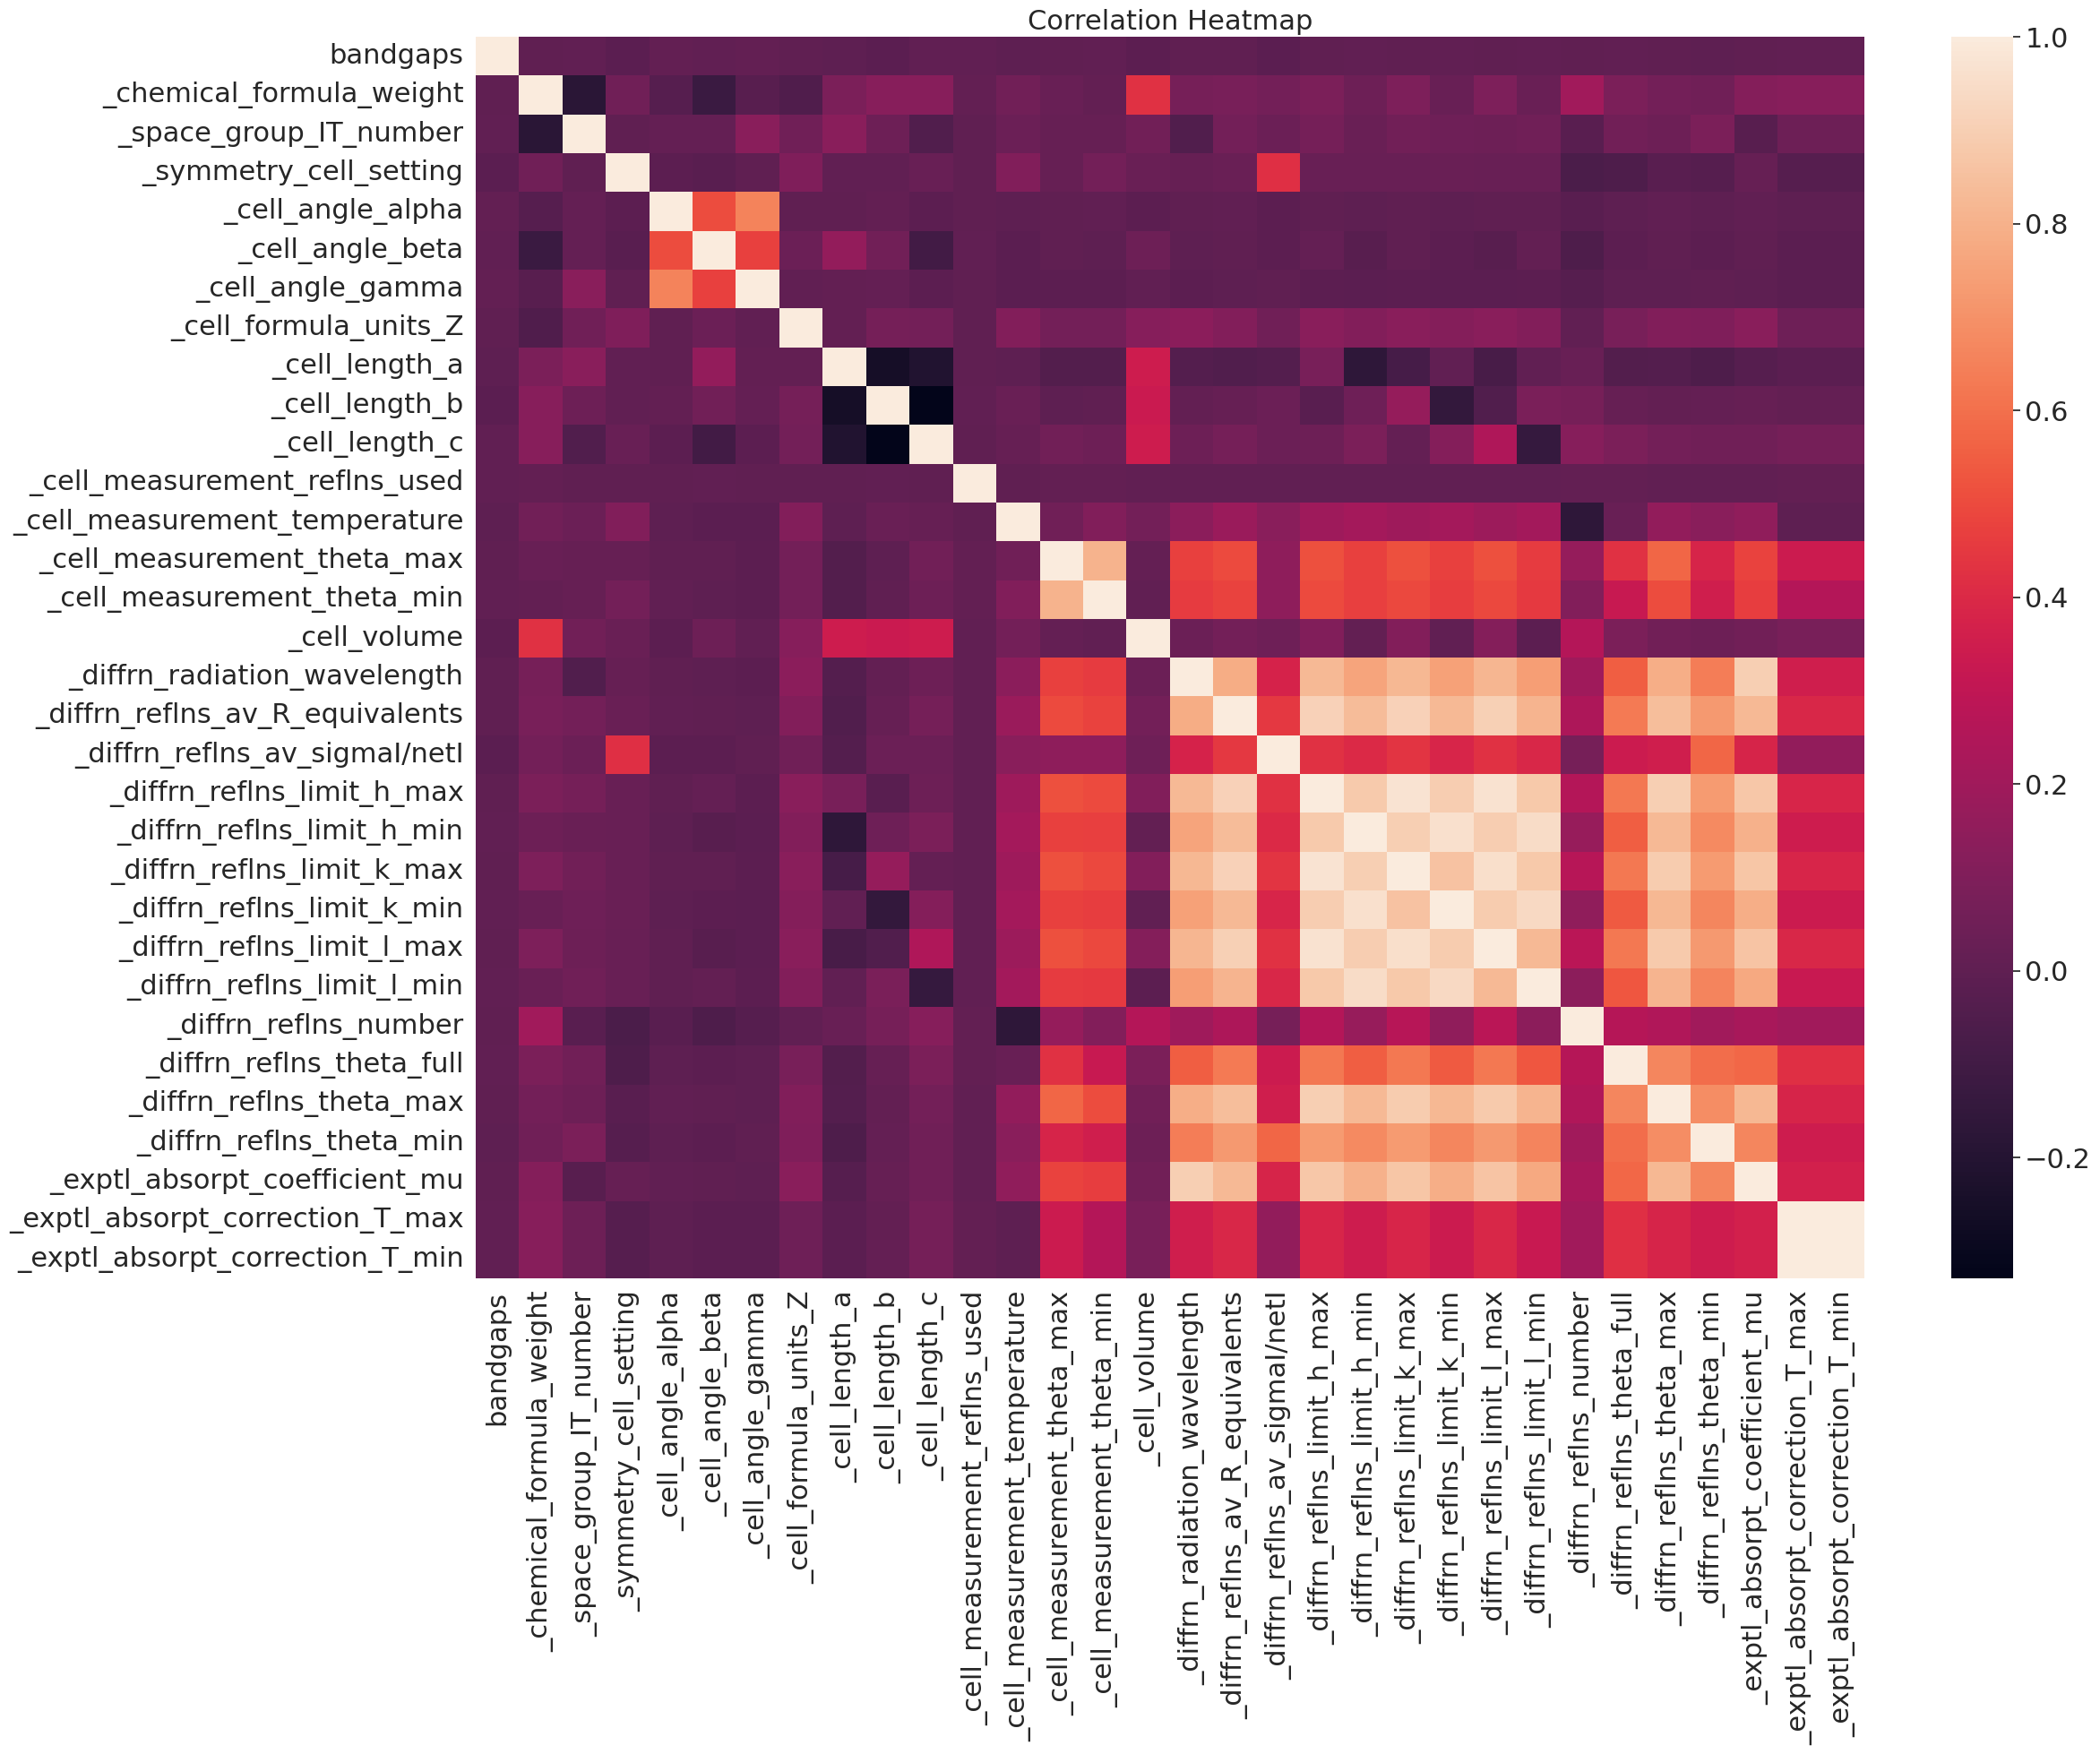

In [20]:
sns.set(font_scale=2.6)
plt.figure(figsize=(25,18))
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
heatmap = sns.heatmap(correlation_matrix)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap');

In [39]:
correlation_matrix['bandgaps']

Unnamed: 0                        -0.024127
bandgaps                           1.000000
_chemical_formula_weight          -0.002154
_space_group_IT_number             0.003691
_symmetry_cell_setting            -0.013975
_cell_angle_alpha                  0.009287
_cell_angle_beta                   0.006875
_cell_angle_gamma                  0.011983
_cell_formula_units_Z              0.000164
_cell_length_a                    -0.003965
_cell_length_b                    -0.013804
_cell_length_c                     0.005384
_cell_measurement_reflns_used      0.005632
_cell_measurement_temperature     -0.006461
_cell_measurement_theta_max        0.002425
_cell_measurement_theta_min        0.005874
_cell_volume                      -0.011421
_diffrn_radiation_wavelength       0.000751
_diffrn_reflns_av_R_equivalents    0.002774
_diffrn_reflns_av_sigmaI/netI     -0.014049
_diffrn_reflns_limit_h_max         0.000211
_diffrn_reflns_limit_h_min         0.005772
_diffrn_reflns_limit_k_max      

In [40]:
correlated_features = set()
for i in range(len(correlation_matrix['bandgaps'])):
    if abs(correlation_matrix['bandgaps'][i]) > 0.1:
        colname = correlation_matrix.columns[i]
        print(f"{colname} : {correlation_matrix['bandgaps'][i]}")
        correlated_features.add(colname)

bandgaps : 1.0


In [41]:
X = df.drop(['ids', '_chemical_formula_sum', '_symmetry_space_group_name_H-M','bandgaps'], axis=1)
Y = df['bandgaps']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=20)

In [117]:
# Normalize train and test set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
# Spot checking various regression models
models = []

models.append(("Linear Regression", LinearRegression()))
models.append(("Support Vector Machines", SVR(C=100)))
models.append(("Random Firest", RandomForestRegressor()))
models.append(("MLP", MLPRegressor(max_iter=500)))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Extreme Gradient Boosting", XGBRegressor()))

results = []
names = []
for name, model in models:
    r2 = cross_val_score(model, X_train, y_train,  cv=10, scoring='r2', n_jobs=-1)
    erorr = cross_val_score(model, X_train, y_train,  cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
    names.append(name)
    results.append([np.abs(erorr),np.abs(r2)])

for i in range(len(names)):
    print(f'{names[i]} - R2 score:{results[i][1].mean()} - RMSE: {results[i][0].mean()}')

Linear Regression - R2 score:0.0011844718212605464 - RMSE: 1.0316585455614198
Support Vector Machines - R2 score:0.012355999626396085 - RMSE: 1.0375950212403509
Random Firest - R2 score:0.2029680086469594 - RMSE: 1.1328249126666052
MLP - R2 score:0.003786652970900217 - RMSE: 1.033925197255688
Decision Tree - R2 score:1.0657293999929784 - RMSE: 1.4816291779313597
Extreme Gradient Boosting - R2 score:0.0817272181847801 - RMSE: 1.0723695695534776


In [66]:
pca = PCA(n_components=20).fit(X_train)
loadings = pca.components_
pca_features = pca.transform(X_train)

Total value variance: 0.9653284663150674


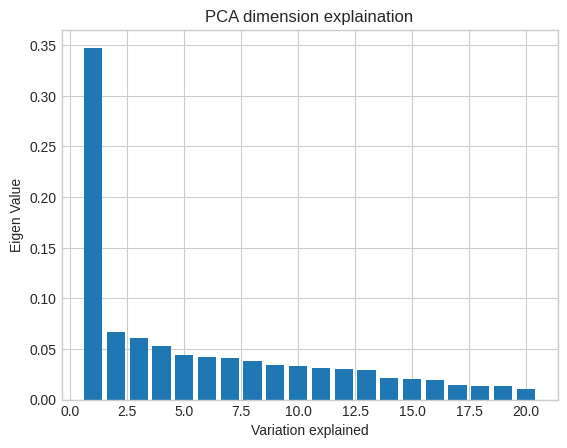

In [69]:
print(f"Total value variance: {sum(pca.explained_variance_ratio_)}")

plt.xlabel('Variation explained')
plt.ylabel('Eigen Value')
plt.title('PCA dimension explaination')
plt.bar(list(range(1,21)),pca.explained_variance_ratio_)
plt.show()

In [71]:
#Applying PCA
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [72]:
# Spot checking various regression models
models = []

models.append(("Linear Regression", LinearRegression()))
models.append(("Support Vector Machines", SVR(C=100)))
models.append(("Random Firest", RandomForestRegressor()))
models.append(("MLP", MLPRegressor(max_iter=500)))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Extreme Gradient Boosting", XGBRegressor()))

results = []
names = []
for name, model in models:
    r2 = cross_val_score(model, X_train, y_train,  cv=10, scoring='r2', n_jobs=-1)
    erorr = cross_val_score(model, X_train, y_train,  cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
    names.append(name)
    results.append([np.abs(erorr),np.abs(r2)])

for i in range(len(names)):
    print(f'{names[i]} - R2 score:{results[i][1].mean()} - RMSE: {results[i][0].mean()}')

Linear Regression - R2 score:0.00344777523294737 - RMSE: 1.0323630160816637
Support Vector Machines - R2 score:0.33332702217504984 - RMSE: 1.1899981139392115
Random Firest - R2 score:0.03502105494349543 - RMSE: 1.0463383660330359
MLP - R2 score:0.09438462577344482 - RMSE: 1.0885152718146265
Decision Tree - R2 score:1.1124522140438813 - RMSE: 1.5002053654514729
Extreme Gradient Boosting - R2 score:0.12559117584377685 - RMSE: 1.0934704439635188


In [74]:
new_df = pd.read_csv("final_db.csv", sep='\t')

In [132]:
df['_chemical_formula_sum'] = df['_chemical_formula_sum'].apply(transform_value)

In [75]:
space_vals_temp = df['_symmetry_space_group_name_H-M']
new_df['_symmetry_space_group_name_H-M'] = space_vals_temp.astype(str)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(new_df['_symmetry_space_group_name_H-M'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
space_vals_encoded = onehot_encoder.fit_transform(integer_encoded)
new_df['_symmetry_space_group_name_H-M'] = integer_encoded


In [139]:
space_vals_temp = df['_chemical_formula_sum']
new_df['_chemical_formula_sum'] = space_vals_temp.astype(str)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(new_df['_chemical_formula_sum'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
space_vals_encoded = onehot_encoder.fit_transform(integer_encoded)
new_df['_chemical_formula_sum'] = integer_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [142]:
new_df= new_df.dropna(axis = 0, how ='any')  

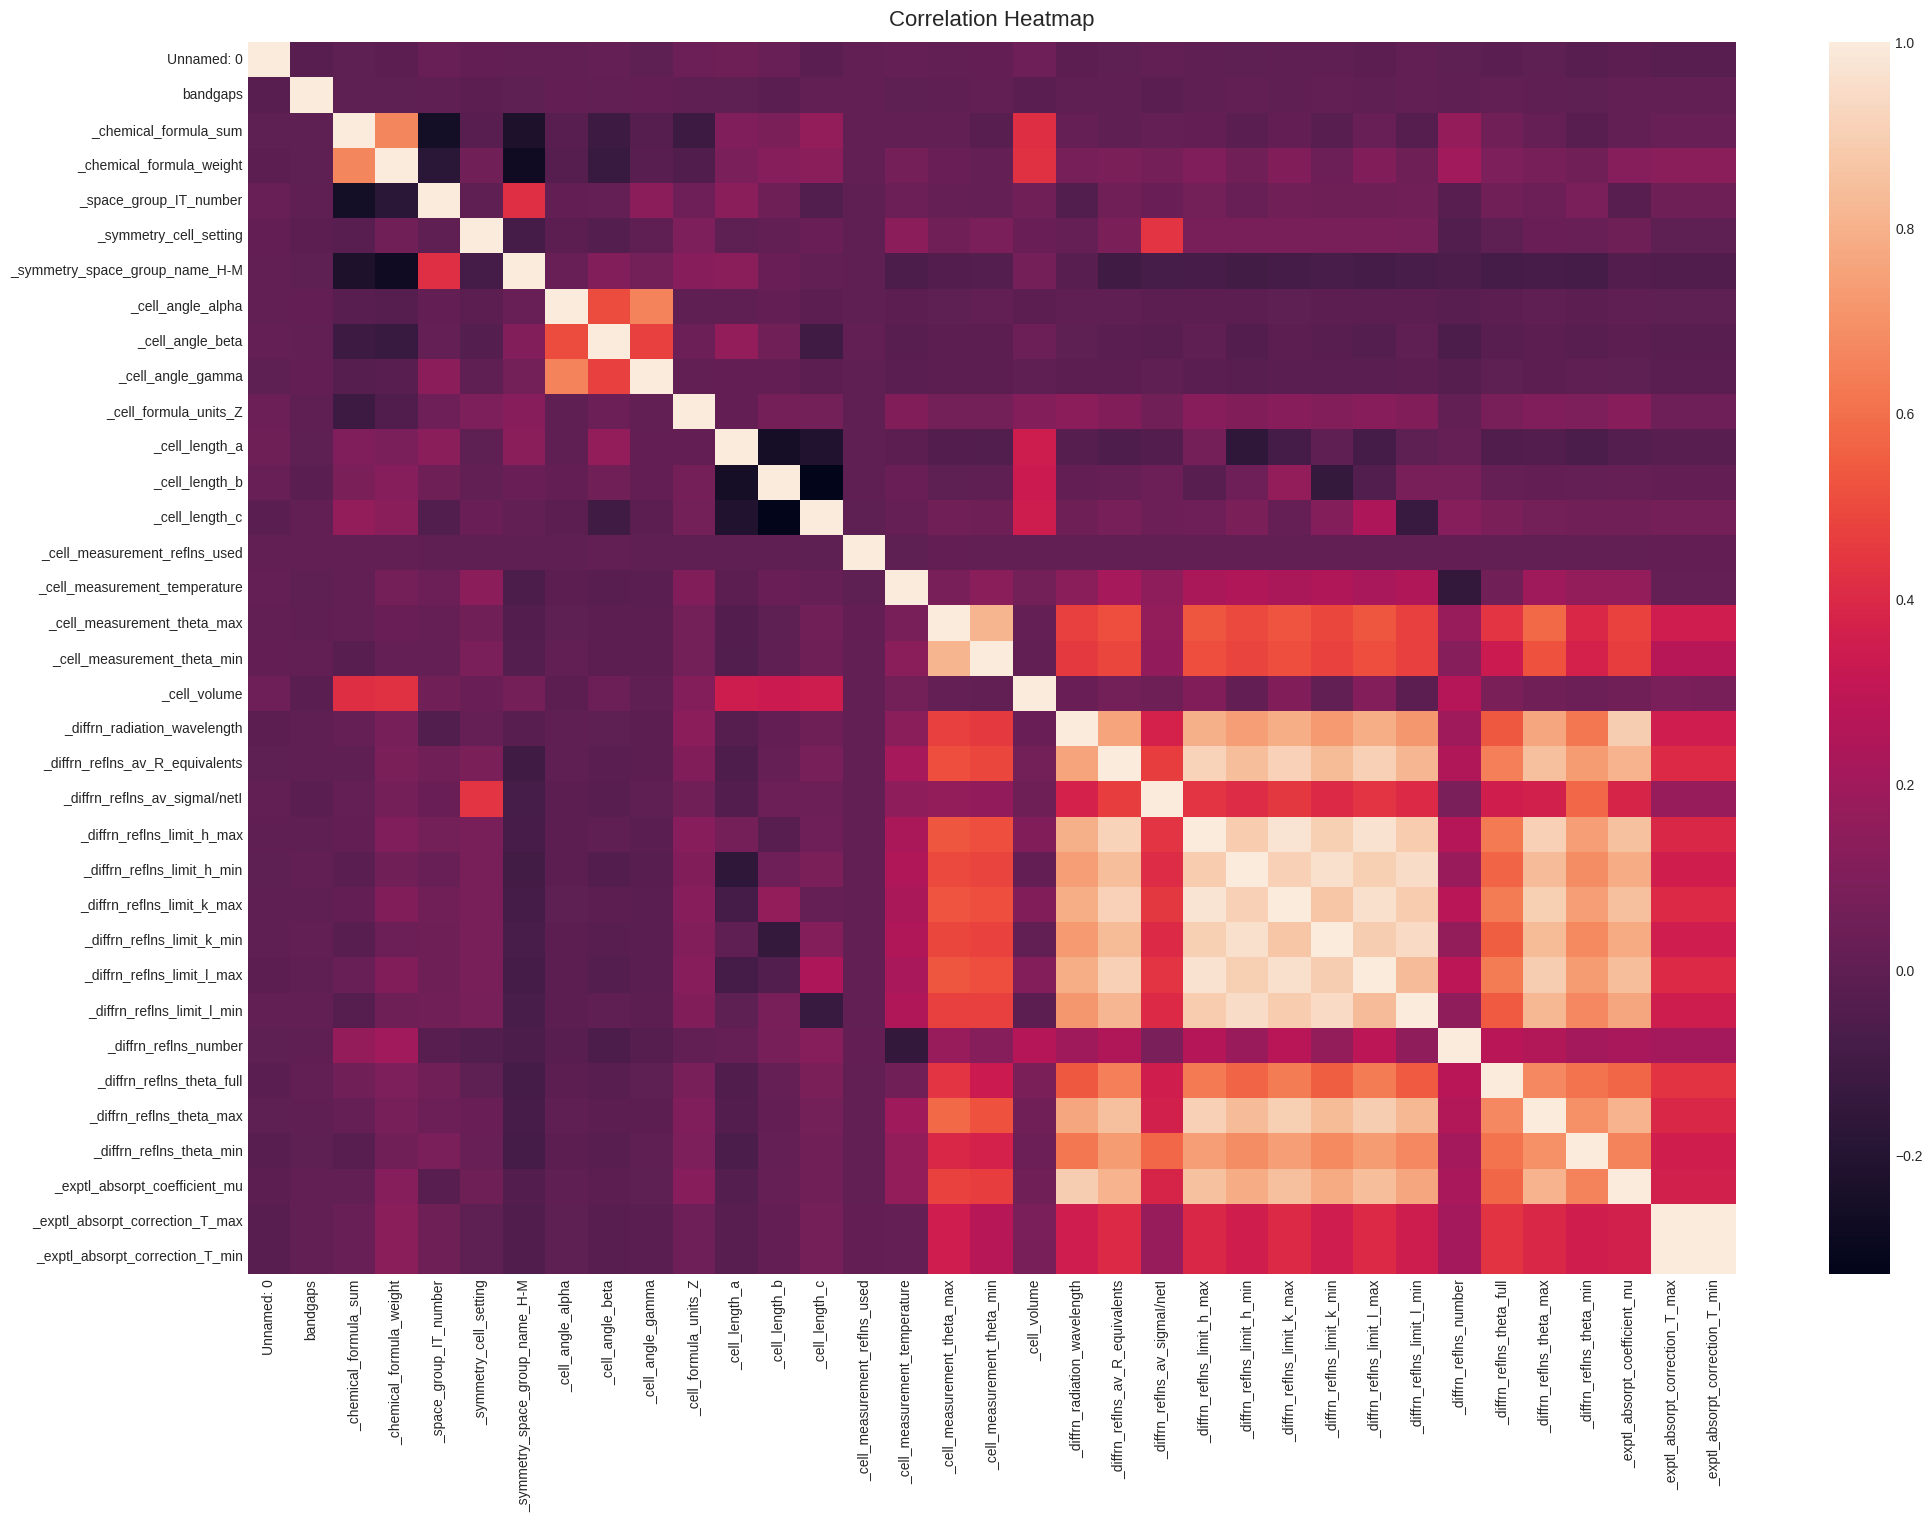

In [144]:
correlation_matrix=new_df.drop(['ids'], axis=1).corr(method='pearson', min_periods=1)
plt.figure(figsize=(24, 16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(correlation_matrix)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

In [145]:
X = new_df.drop(['ids','bandgaps'], axis=1)
Y = new_df['bandgaps']
Y = Y.values

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=20)
# Normalize train and test set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
# Spot checking various regression models
models = []

models.append(("Linear Regression", LinearRegression()))
models.append(("Support Vector Machines", SVR(C=100)))
models.append(("Random Firest", RandomForestRegressor()))
models.append(("MLP", MLPRegressor(max_iter=500)))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Extreme Gradient Boosting", XGBRegressor()))

results = []
names = []
for name, model in models:
    r2 = cross_val_score(model, X_train, y_train,  cv=10, scoring='r2', n_jobs=-1)
    erorr = cross_val_score(model, X_train, y_train,  cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
    names.append(name)
    results.append([np.abs(erorr),np.abs(r2)])

for i in range(len(names)):
    print(f'{names[i]} - R2 score:{results[i][1].mean()} - RMSE: {results[i][0].mean()}')

Linear Regression - R2 score:0.4113733952298543 - RMSE: 1.1521564195775649
Support Vector Machines - R2 score:0.42709776446883485 - RMSE: 1.2176132837846048
Random Firest - R2 score:0.035557900686706036 - RMSE: 1.036874461004186
MLP - R2 score:2.419479793514421 - RMSE: 1.111895939015429
Decision Tree - R2 score:1.161335508938913 - RMSE: 1.499587431601124
Extreme Gradient Boosting - R2 score:0.13593264419727472 - RMSE: 1.0866016979575543


In [ ]:
parameters=[{'C': [1,10,100,1000],'kernel':['rbf','linear'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
svr =SVR()
grid_search=GridSearchCV(estimator=svr,
                         param_grid=parameters,
                         scoring='neg_root_mean_squared_error',
                         cv=5,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.abs(grid_search.best_score_))

### DEEP LEARNING PROGRESS

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM,Dense, Dropout, BatchNormalization, Activation, Embedding, Conv1D, MaxPooling1D, Flatten, concatenate
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer


import math


In [68]:
new_df = pd.read_csv("final_db.csv", sep='\t')
new_df= new_df.dropna(axis = 0, how ='any')  
# new_df['_chemical_formula_sum'] = new_df['_chemical_formula_sum'].apply(transform_value)

In [81]:
# Extract the features and target variable
# X_text = new_df[['_chemical_formula_sum','_symmetry_space_group_name_H-M']].values  # Numerical features
X_text1 = new_df['_chemical_formula_sum'].values  # Textual feature 1
X_text2 = new_df['_symmetry_space_group_name_H-M'].values  # Textual feature 2
X_text = X_text1 #+ ' ' + X_text2
X_numerical = new_df.drop(['ids','bandgaps','_chemical_formula_sum','_symmetry_space_group_name_H-M'], axis=1).values  # Textual features

In [82]:
# Standardize the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

In [83]:
# Tokenize and vectorize the text data
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(X_text)
X_text_sequences = tokenizer.texts_to_sequences(X_text)
X_text_padded = pad_sequences(X_text_sequences)

In [84]:
# Split the data into training and testing sets
X_numerical_train, X_numerical_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numerical_scaled, X_text_padded, new_df['bandgaps'].values, test_size=0.15, random_state=42)


In [85]:
# Concatenate numerical and text features
X_combined_train = tf.concat([X_numerical_train, X_text_train], axis=1)
X_combined_test = tf.concat([X_numerical_test, X_text_test], axis=1)
combined_input = Input(shape=(X_combined_train.shape[1],), name='combined_input')



In [ ]:
# Input layer
combined_input = Input(shape=(X_combined_train.shape[1],), name='combined_input')

# Transformation layers for more complexity
dense_layer_1 = Dense(128)(combined_input)
batch_norm_1 = BatchNormalization()(dense_layer_1)
activation_1 = Activation('relu')(batch_norm_1)
dropout_1 = Dropout(0.5)(activation_1)

dense_layer_2 = Dense(64)(dropout_1)
batch_norm_2 = BatchNormalization()(dense_layer_2)
activation_2 = Activation('relu')(batch_norm_2)
dropout_2 = Dropout(0.5)(activation_2)

# Additional Dense and Dropout layers
dense_layer_3 = Dense(32, activation='relu')(dropout_2)

# Output layer for regression (linear activation)
output = Dense(1, activation='linear')(dense_layer_3)

# Create the more complex regression model
model = Model(inputs=combined_input, outputs=output)

# Define custom optimizer for regression (e.g., Adam)
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1, amsgrad=False)

# Compile the more complex regression model
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(
    X_combined_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)
# Evaluate the model
loss = model.evaluate(X_combined_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 16.6655 - mae: 3.7933 - val_loss: 7.1804 - val_mae: 2.4648
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4321 - mae: 2.2306 - val_loss: 4.3755 - val_mae: 1.8352
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2456 - mae: 1.4385 - val_loss: 3.1067 - val_mae: 1.4779
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5142 - mae: 1.2321 - val_loss: 2.4843 - val_mae: 1.2747
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2776 - mae: 1.1734 - val_loss: 2.1842 - val_mae: 1.1741
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0512 - mae: 1.1126 - val_loss: 2.1021 - val_mae: 1.1453
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9777 - mae: 1.0937 - val_loss: 1.9875 - val_mae: 1.1067
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8196 - mae: 1.0429 - val_loss: 1.9032 - val_mae: 1.0783
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 10537
'y' sizes: 1860


In [87]:
# Calculate R2 score separately
y_pred = model.predict(X_combined_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
R2 Score: -0.06131104290546241


In [33]:
numerical_input = Input(shape=(X_numerical_train.shape[1],))
text_input = Input(shape=(X_text_train.shape[1],))


In [39]:
def correlation_coefficient(y_true, y_pred):
    pearson_r, update_op = tf.keras.metrics.streaming_pearson_correlation(y_pred, y_true, name='pearson_r')
    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'pearson_r'  in i.name.split('/')]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        pearson_r = tf.identity(pearson_r)
        return 1-pearson_r**2

In [34]:
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=13)(text_input)
lstm_layer = LSTM(13)(embedding_layer)

concatenated = concatenate([numerical_input, lstm_layer])
output = Dense(1, activation='linear')(concatenated)

model = Model(inputs=[numerical_input, text_input], outputs=output)
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit([X_numerical_train, X_text_train], y_train, epochs=300, batch_size=64, validation_split=0.15)

# Evaluate the model
loss = model.evaluate([X_numerical_test, X_text_test], y_test)
print(f'Test Loss: {loss}')

Epoch 1/300


/home/goback-server/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/optimizers/base_optimizer.py:31: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 11.6329 - mae: 3.0624 - val_loss: 10.9823 - val_mae: 2.9813
Epoch 2/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.2063 - mae: 2.8667 - val_loss: 9.3021 - val_mae: 2.7228
Epoch 3/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3857 - mae: 2.5666 - val_loss: 7.2765 - val_mae: 2.3624
Epoch 4/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4296 - mae: 2.1833 - val_loss: 5.0529 - val_mae: 1.8952
Epoch 5/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3255 - mae: 1.7349 - val_loss: 3.2567 - val_mae: 1.4483
Epoch 6/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7808 - mae: 1.3129 - val_loss: 2.1852 - val_mae: 1.1320
Epoch 7/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9025 - mae: 1.0542 - val_loss: 1.6580 - val_mae: 0.9639
Epoch 8/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5281 - mae: 0.9315 - val_loss: 1.4237 - val_mae: 0.8898
Epoch 9/300
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

In [ ]:
WORD_TEXT = len(tokenizer.word_index) +1
# Create a random weights matrix
random_weights = np.random.normal(size=(WORD_TEXT, 32),scale=0.01)

In [51]:
# Text branch
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32)(text_input)
conv1d_1 = Conv1D(filters=512, kernel_size=9, padding='same', activation='relu')(embedding_layer)
maxpool_1 = MaxPooling1D(pool_size=1)(conv1d_1)
conv1d_2 = Conv1D(filters=512, kernel_size=9, padding='same', activation='relu')(maxpool_1)
maxpool_2 = MaxPooling1D(pool_size=1)(conv1d_2)
dropout_1 = Dropout(0.3)(maxpool_2)
flatten = Flatten()(dropout_1)

# Numerical branch
numerical_dense_1 = Dense(64, activation='relu')(numerical_input)
numerical_dense_2 = Dense(16, activation='relu')(numerical_dense_1)

# Concatenate branches
concatenated = concatenate([numerical_dense_2, flatten])

# Output layer
output = Dense(1, activation='softmax', name='output')(concatenated)

# Create the model
model = tf.keras.Model(inputs=[numerical_input, text_input], outputs=output, name="MS_DNN")

# Define custom optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1, decay=0.0, amsgrad=False)

# Compile the model with metrics
model.compile(optimizer=adam, loss='mean_squared_error', metrics=[tf.keras.metrics.Precision()])
print("DL model built: ")
model.summary()

DL model built: 


Model: "MS_DNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 13)        │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ embedding_22        │ (None, 13, 32)    │  13,184 │ input_layer_3[0][0]  │
│ (Embedding)         │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 13, 512)   │  49,664 │ embedding_22[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling1d_20    │ (None, 13, 512)   │       0 │ conv1d_20[0][0]      │
│ (MaxPooling1D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 13, 512)   │ 786,944 │ max_pooling1d_20[0]… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ input_layer_2       │ (None, 32)        │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling1d_21    │ (None, 13, 512)   │       0 │ conv1d_21[0][0]      │
│ (MaxPooling1D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │   2,112 │ input_layer_2[0][0]  │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_10          │ (None, 13, 512)   │       0 │ max_pooling1d_21[0]… │
│ (Dropout)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_27 (Dense)    │ (None, 16)        │   1,040 │ dense_26[0][0]       │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ flatten_10          │ (None, 6656)      │       0 │ dropout_10[0][0]     │
│ (Flatten)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ concatenate_6       │ (None, 6672)      │       0 │ dense_27[0][0],      │
│ (Concatenate)       │                   │         │ flatten_10[0][0]     │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ output (Dense)      │ (None, 1)         │   6,673 │ concatenate_6[0][0]  │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 859,617 (3.28 MB)

 Trainable params: 859,617 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(
    {'input_layer_2': X_numerical_train, 'input_layer_3': X_text_train},
    {'output': y_train},
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
# Evaluate the model
loss = model.evaluate([X_numerical_test, X_text_test], y_test)
print(f'Test Loss: {loss}')

In [ ]:
rfc = RandomForestRegressor(n_jobs=2,random_state=0)
lab_enc = preprocessing.LabelEncoder()
rfc.fit(X_train,y_train)

y_pred_rf = rfc.predict(X_test)

linear.fit(y_test.values.reshape(-1, 1),y_pred_rf.reshape(-1, 1))
call = y_test.values.reshape(-1,1)
line = linear.predict(call)

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

y_pred_ada = ada.predict(X_test)

In [ ]:
# Mean squared error
linear_mse = mean_squared_error(y_pred_linear,y_test)
rf_mse = mean_squared_error(y_pred_rf,y_test)
ada_mse = mean_squared_error(y_pred_ada,y_test)

mse = [linear_mse, rf_mse, ada_mse]
models = ['Linear Regressor', 'Random Forest', 'Adaboosting']
y_pos = np.arange(len(models))
y_pos

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,20))
axs[0, 0].scatter(y_test, y_pred_linear , marker ='o', edgecolor ='blue',color='white')
axs[0, 0].plot(y_test, line, color='red',linewidth=3)
axs[0, 0].set_title("Linear Regressor",fontweight="bold",size=15)
axs[0, 0].set_xlabel('Test BandGap')
axs[0, 0].set_ylabel('Predicted BandGap')

axs[0, 1].scatter(y_test, y_pred_rf , marker ='o', edgecolor ='blue',color='white')
axs[0, 1].plot(y_test, line, color='red',linewidth=3)
axs[0, 1].set_title("Random Forest",fontweight="bold",size=15)
axs[0, 1].set_xlabel('Test BandGap')
axs[0, 1].set_ylabel('Predicted BandGap')

axs[1, 0].scatter(y_test, y_pred_ada , marker ='o', edgecolor ='blue',color='white')
axs[1, 0].plot(y_test, line, color='red',linewidth=3)
axs[1, 0].set_title("Adaboosting",fontweight="bold",size=15)
axs[1, 0].set_xlabel('Test BandGap')
axs[1, 0].set_ylabel('Predicted BandGap')

axs[1, 1].bar(y_pos, mse, color=['red','green','blue'])
axs[1, 1].set_ylim([0,0.3])
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(models)
axs[1, 1].set_title("Errors margin",fontweight="bold",size=15)
axs[1, 1].set_ylabel('Mean squared error')

